## Load the data

In [1]:
import json
from tqdm import tqdm
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import torch

from s4hci.utils.data_handling import load_adi_data, save_as_fits
from s4hci.models.psf_subtraction import S4
from s4hci.models.noise import S4Noise

from applefy.utils.fake_planets import add_fake_planets

# All datasets

In [2]:
datasets = [
    "/fast/mbonse/s4/30_data/HD22049_310_0100_C-0656_A_.hdf5",
    "/fast/mbonse/s4/30_data/HD22049_303_199_C-0065_C_.hdf5",
    "/fast/mbonse/s4/30_data/HD22049_304_199_C-0065_C_.hdf5",
    "/fast/mbonse/s4/30_data/HD22049_351_096_C-0679_A_.hdf5"
]

# Test the first dataset

---------------------------
/fast/mbonse/s4/30_data/HD22049_310_0100_C-0656_A_.hdf5
---------------------------
Loading data ... [DONE]
Creating right reason mask ... [DONE]
Compute validation positions for separation 2.5238095238095237 ...
Setup training data for separation 2.5238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 2.5238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.41s/it]


Re-mask betas for separation 2.5238095238095237 ...
Compute validation errors for separation 2.5238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1252.42it/s]


Compute validation positions for separation 5.0476190476190474 ...
Setup training data for separation 5.0476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 5.0476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.30s/it]


Re-mask betas for separation 5.0476190476190474 ...
Compute validation errors for separation 5.0476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1319.94it/s]


Compute validation positions for separation 7.571428571428571 ...
Setup training data for separation 7.571428571428571 ...
Build normalization frames ... [DONE]
Compute betas for separation 7.571428571428571 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.30s/it]


Re-mask betas for separation 7.571428571428571 ...
Compute validation errors for separation 7.571428571428571 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1324.72it/s]


Compute validation positions for separation 10.095238095238095 ...
Setup training data for separation 10.095238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 10.095238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.29s/it]


Re-mask betas for separation 10.095238095238095 ...
Compute validation errors for separation 10.095238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1340.19it/s]


Compute validation positions for separation 12.619047619047619 ...
Setup training data for separation 12.619047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 12.619047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.32s/it]


Re-mask betas for separation 12.619047619047619 ...
Compute validation errors for separation 12.619047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1359.31it/s]


Compute validation positions for separation 15.142857142857142 ...
Setup training data for separation 15.142857142857142 ...
Build normalization frames ... [DONE]
Compute betas for separation 15.142857142857142 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 15.142857142857142 ...
Compute validation errors for separation 15.142857142857142 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1332.89it/s]


Compute validation positions for separation 17.666666666666664 ...
Setup training data for separation 17.666666666666664 ...
Build normalization frames ... [DONE]
Compute betas for separation 17.666666666666664 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.30s/it]


Re-mask betas for separation 17.666666666666664 ...
Compute validation errors for separation 17.666666666666664 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1323.80it/s]


Compute validation positions for separation 20.19047619047619 ...
Setup training data for separation 20.19047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 20.19047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 20.19047619047619 ...
Compute validation errors for separation 20.19047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1316.14it/s]


Compute validation positions for separation 22.714285714285715 ...
Setup training data for separation 22.714285714285715 ...
Build normalization frames ... [DONE]
Compute betas for separation 22.714285714285715 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 22.714285714285715 ...
Compute validation errors for separation 22.714285714285715 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1321.37it/s]


Compute validation positions for separation 25.238095238095237 ...
Setup training data for separation 25.238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 25.238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 25.238095238095237 ...
Compute validation errors for separation 25.238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1324.32it/s]


Compute validation positions for separation 27.76190476190476 ...
Setup training data for separation 27.76190476190476 ...
Build normalization frames ... [DONE]
Compute betas for separation 27.76190476190476 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 27.76190476190476 ...
Compute validation errors for separation 27.76190476190476 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1342.15it/s]


Compute validation positions for separation 30.285714285714285 ...
Setup training data for separation 30.285714285714285 ...
Build normalization frames ... [DONE]
Compute betas for separation 30.285714285714285 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.29s/it]


Re-mask betas for separation 30.285714285714285 ...
Compute validation errors for separation 30.285714285714285 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1328.59it/s]


Compute validation positions for separation 32.80952380952381 ...
Setup training data for separation 32.80952380952381 ...
Build normalization frames ... [DONE]
Compute betas for separation 32.80952380952381 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 32.80952380952381 ...
Compute validation errors for separation 32.80952380952381 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1289.73it/s]


Compute validation positions for separation 35.33333333333333 ...
Setup training data for separation 35.33333333333333 ...
Build normalization frames ... [DONE]
Compute betas for separation 35.33333333333333 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 35.33333333333333 ...
Compute validation errors for separation 35.33333333333333 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1309.04it/s]


Compute validation positions for separation 37.857142857142854 ...
Setup training data for separation 37.857142857142854 ...
Build normalization frames ... [DONE]
Compute betas for separation 37.857142857142854 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.30s/it]


Re-mask betas for separation 37.857142857142854 ...
Compute validation errors for separation 37.857142857142854 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1289.91it/s]


Compute validation positions for separation 40.38095238095238 ...
Setup training data for separation 40.38095238095238 ...
Build normalization frames ... [DONE]
Compute betas for separation 40.38095238095238 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 40.38095238095238 ...
Compute validation errors for separation 40.38095238095238 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1325.61it/s]


Compute validation positions for separation 42.904761904761905 ...
Setup training data for separation 42.904761904761905 ...
Build normalization frames ... [DONE]
Compute betas for separation 42.904761904761905 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 42.904761904761905 ...
Compute validation errors for separation 42.904761904761905 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1329.62it/s]


Compute validation positions for separation 45.42857142857143 ...
Setup training data for separation 45.42857142857143 ...
Build normalization frames ... [DONE]
Compute betas for separation 45.42857142857143 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.29s/it]


Re-mask betas for separation 45.42857142857143 ...
Compute validation errors for separation 45.42857142857143 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1360.04it/s]


Compute validation positions for separation 47.95238095238095 ...
Setup training data for separation 47.95238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 47.95238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 47.95238095238095 ...
Compute validation errors for separation 47.95238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1320.83it/s]


Compute validation positions for separation 50.476190476190474 ...
Setup training data for separation 50.476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 50.476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]


Re-mask betas for separation 50.476190476190474 ...
Compute validation errors for separation 50.476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1310.38it/s]


Recommended Lambda = 1189.53
Make sure to check if the tested range of lambda values is covering the global minimum!


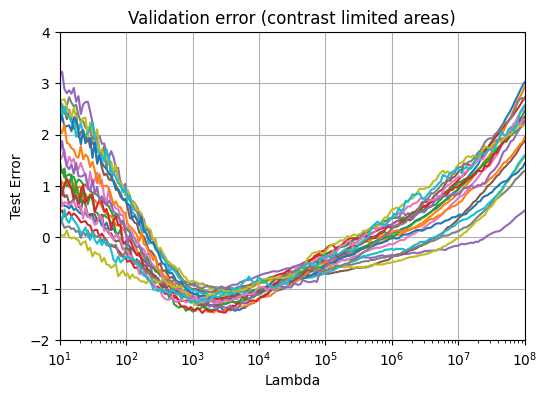

---------------------------
/fast/mbonse/s4/30_data/HD22049_303_199_C-0065_C_.hdf5
---------------------------
Loading data ... [DONE]
Creating right reason mask ... [DONE]
Compute validation positions for separation 2.5238095238095237 ...
Setup training data for separation 2.5238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 2.5238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 2.5238095238095237 ...
Compute validation errors for separation 2.5238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1390.57it/s]


Compute validation positions for separation 5.0476190476190474 ...
Setup training data for separation 5.0476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 5.0476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 5.0476190476190474 ...
Compute validation errors for separation 5.0476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1403.55it/s]


Compute validation positions for separation 7.571428571428571 ...
Setup training data for separation 7.571428571428571 ...
Build normalization frames ... [DONE]
Compute betas for separation 7.571428571428571 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 7.571428571428571 ...
Compute validation errors for separation 7.571428571428571 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1387.23it/s]


Compute validation positions for separation 10.095238095238095 ...
Setup training data for separation 10.095238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 10.095238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 10.095238095238095 ...
Compute validation errors for separation 10.095238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1379.22it/s]


Compute validation positions for separation 12.619047619047619 ...
Setup training data for separation 12.619047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 12.619047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.24s/it]


Re-mask betas for separation 12.619047619047619 ...
Compute validation errors for separation 12.619047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1365.30it/s]


Compute validation positions for separation 15.142857142857142 ...
Setup training data for separation 15.142857142857142 ...
Build normalization frames ... [DONE]
Compute betas for separation 15.142857142857142 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 15.142857142857142 ...
Compute validation errors for separation 15.142857142857142 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1380.91it/s]


Compute validation positions for separation 17.666666666666664 ...
Setup training data for separation 17.666666666666664 ...
Build normalization frames ... [DONE]
Compute betas for separation 17.666666666666664 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 17.666666666666664 ...
Compute validation errors for separation 17.666666666666664 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1381.42it/s]


Compute validation positions for separation 20.19047619047619 ...
Setup training data for separation 20.19047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 20.19047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 20.19047619047619 ...
Compute validation errors for separation 20.19047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1407.87it/s]


Compute validation positions for separation 22.714285714285715 ...
Setup training data for separation 22.714285714285715 ...
Build normalization frames ... [DONE]
Compute betas for separation 22.714285714285715 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 22.714285714285715 ...
Compute validation errors for separation 22.714285714285715 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1370.43it/s]


Compute validation positions for separation 25.238095238095237 ...
Setup training data for separation 25.238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 25.238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 25.238095238095237 ...
Compute validation errors for separation 25.238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1382.46it/s]


Compute validation positions for separation 27.76190476190476 ...
Setup training data for separation 27.76190476190476 ...
Build normalization frames ... [DONE]
Compute betas for separation 27.76190476190476 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 27.76190476190476 ...
Compute validation errors for separation 27.76190476190476 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1366.62it/s]


Compute validation positions for separation 30.285714285714285 ...
Setup training data for separation 30.285714285714285 ...
Build normalization frames ... [DONE]
Compute betas for separation 30.285714285714285 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 30.285714285714285 ...
Compute validation errors for separation 30.285714285714285 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1362.33it/s]


Compute validation positions for separation 32.80952380952381 ...
Setup training data for separation 32.80952380952381 ...
Build normalization frames ... [DONE]
Compute betas for separation 32.80952380952381 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 32.80952380952381 ...
Compute validation errors for separation 32.80952380952381 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1374.34it/s]


Compute validation positions for separation 35.33333333333333 ...
Setup training data for separation 35.33333333333333 ...
Build normalization frames ... [DONE]
Compute betas for separation 35.33333333333333 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.24s/it]


Re-mask betas for separation 35.33333333333333 ...
Compute validation errors for separation 35.33333333333333 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1379.13it/s]


Compute validation positions for separation 37.857142857142854 ...
Setup training data for separation 37.857142857142854 ...
Build normalization frames ... [DONE]
Compute betas for separation 37.857142857142854 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.24s/it]


Re-mask betas for separation 37.857142857142854 ...
Compute validation errors for separation 37.857142857142854 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1380.63it/s]


Compute validation positions for separation 40.38095238095238 ...
Setup training data for separation 40.38095238095238 ...
Build normalization frames ... [DONE]
Compute betas for separation 40.38095238095238 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]


Re-mask betas for separation 40.38095238095238 ...
Compute validation errors for separation 40.38095238095238 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1400.93it/s]


Compute validation positions for separation 42.904761904761905 ...
Setup training data for separation 42.904761904761905 ...
Build normalization frames ... [DONE]
Compute betas for separation 42.904761904761905 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 42.904761904761905 ...
Compute validation errors for separation 42.904761904761905 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1378.23it/s]


Compute validation positions for separation 45.42857142857143 ...
Setup training data for separation 45.42857142857143 ...
Build normalization frames ... [DONE]
Compute betas for separation 45.42857142857143 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 45.42857142857143 ...
Compute validation errors for separation 45.42857142857143 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1450.53it/s]


Compute validation positions for separation 47.95238095238095 ...
Setup training data for separation 47.95238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 47.95238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 47.95238095238095 ...
Compute validation errors for separation 47.95238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1400.61it/s]


Compute validation positions for separation 50.476190476190474 ...
Setup training data for separation 50.476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 50.476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it]


Re-mask betas for separation 50.476190476190474 ...
Compute validation errors for separation 50.476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1363.46it/s]


Recommended Lambda = 1189.53
Make sure to check if the tested range of lambda values is covering the global minimum!


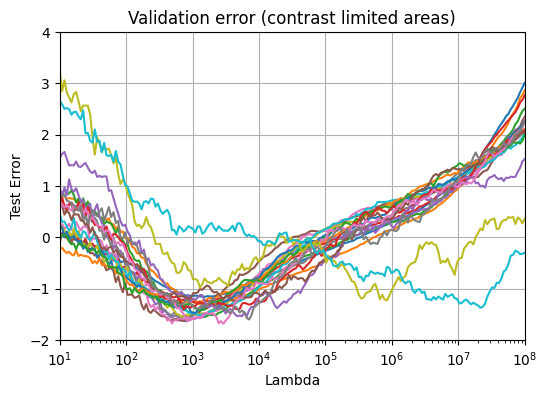

---------------------------
/fast/mbonse/s4/30_data/HD22049_304_199_C-0065_C_.hdf5
---------------------------
Loading data ... [DONE]
Creating right reason mask ... [DONE]
Compute validation positions for separation 2.5238095238095237 ...
Setup training data for separation 2.5238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 2.5238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.21s/it]


Re-mask betas for separation 2.5238095238095237 ...
Compute validation errors for separation 2.5238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1386.42it/s]


Compute validation positions for separation 5.0476190476190474 ...
Setup training data for separation 5.0476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 5.0476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 5.0476190476190474 ...
Compute validation errors for separation 5.0476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1411.66it/s]


Compute validation positions for separation 7.571428571428571 ...
Setup training data for separation 7.571428571428571 ...
Build normalization frames ... [DONE]
Compute betas for separation 7.571428571428571 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it]


Re-mask betas for separation 7.571428571428571 ...
Compute validation errors for separation 7.571428571428571 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1393.23it/s]


Compute validation positions for separation 10.095238095238095 ...
Setup training data for separation 10.095238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 10.095238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it]


Re-mask betas for separation 10.095238095238095 ...
Compute validation errors for separation 10.095238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1405.50it/s]


Compute validation positions for separation 12.619047619047619 ...
Setup training data for separation 12.619047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 12.619047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.22s/it]


Re-mask betas for separation 12.619047619047619 ...
Compute validation errors for separation 12.619047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1398.06it/s]


Compute validation positions for separation 15.142857142857142 ...
Setup training data for separation 15.142857142857142 ...
Build normalization frames ... [DONE]
Compute betas for separation 15.142857142857142 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.21s/it]


Re-mask betas for separation 15.142857142857142 ...
Compute validation errors for separation 15.142857142857142 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1372.46it/s]


Compute validation positions for separation 17.666666666666664 ...
Setup training data for separation 17.666666666666664 ...
Build normalization frames ... [DONE]
Compute betas for separation 17.666666666666664 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 17.666666666666664 ...
Compute validation errors for separation 17.666666666666664 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1408.15it/s]


Compute validation positions for separation 20.19047619047619 ...
Setup training data for separation 20.19047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 20.19047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.21s/it]


Re-mask betas for separation 20.19047619047619 ...
Compute validation errors for separation 20.19047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1395.43it/s]


Compute validation positions for separation 22.714285714285715 ...
Setup training data for separation 22.714285714285715 ...
Build normalization frames ... [DONE]
Compute betas for separation 22.714285714285715 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it]


Re-mask betas for separation 22.714285714285715 ...
Compute validation errors for separation 22.714285714285715 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1393.74it/s]


Compute validation positions for separation 25.238095238095237 ...
Setup training data for separation 25.238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 25.238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.18s/it]


Re-mask betas for separation 25.238095238095237 ...
Compute validation errors for separation 25.238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1367.35it/s]


Compute validation positions for separation 27.76190476190476 ...
Setup training data for separation 27.76190476190476 ...
Build normalization frames ... [DONE]
Compute betas for separation 27.76190476190476 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 27.76190476190476 ...
Compute validation errors for separation 27.76190476190476 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1383.67it/s]


Compute validation positions for separation 30.285714285714285 ...
Setup training data for separation 30.285714285714285 ...
Build normalization frames ... [DONE]
Compute betas for separation 30.285714285714285 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it]


Re-mask betas for separation 30.285714285714285 ...
Compute validation errors for separation 30.285714285714285 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1390.93it/s]


Compute validation positions for separation 32.80952380952381 ...
Setup training data for separation 32.80952380952381 ...
Build normalization frames ... [DONE]
Compute betas for separation 32.80952380952381 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it]


Re-mask betas for separation 32.80952380952381 ...
Compute validation errors for separation 32.80952380952381 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1389.15it/s]


Compute validation positions for separation 35.33333333333333 ...
Setup training data for separation 35.33333333333333 ...
Build normalization frames ... [DONE]
Compute betas for separation 35.33333333333333 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 35.33333333333333 ...
Compute validation errors for separation 35.33333333333333 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1394.81it/s]


Compute validation positions for separation 37.857142857142854 ...
Setup training data for separation 37.857142857142854 ...
Build normalization frames ... [DONE]
Compute betas for separation 37.857142857142854 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 37.857142857142854 ...
Compute validation errors for separation 37.857142857142854 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1395.19it/s]


Compute validation positions for separation 40.38095238095238 ...
Setup training data for separation 40.38095238095238 ...
Build normalization frames ... [DONE]
Compute betas for separation 40.38095238095238 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 40.38095238095238 ...
Compute validation errors for separation 40.38095238095238 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1413.28it/s]


Compute validation positions for separation 42.904761904761905 ...
Setup training data for separation 42.904761904761905 ...
Build normalization frames ... [DONE]
Compute betas for separation 42.904761904761905 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 42.904761904761905 ...
Compute validation errors for separation 42.904761904761905 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1405.53it/s]


Compute validation positions for separation 45.42857142857143 ...
Setup training data for separation 45.42857142857143 ...
Build normalization frames ... [DONE]
Compute betas for separation 45.42857142857143 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it]


Re-mask betas for separation 45.42857142857143 ...
Compute validation errors for separation 45.42857142857143 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1363.80it/s]


Compute validation positions for separation 47.95238095238095 ...
Setup training data for separation 47.95238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 47.95238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it]


Re-mask betas for separation 47.95238095238095 ...
Compute validation errors for separation 47.95238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1408.53it/s]


Compute validation positions for separation 50.476190476190474 ...
Setup training data for separation 50.476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 50.476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Re-mask betas for separation 50.476190476190474 ...
Compute validation errors for separation 50.476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1413.45it/s]


Recommended Lambda = 1189.53
Make sure to check if the tested range of lambda values is covering the global minimum!


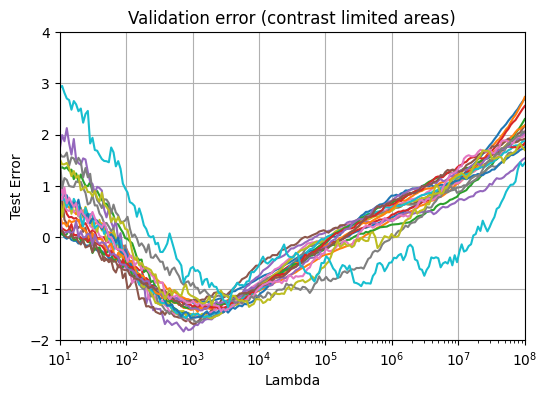

---------------------------
/fast/mbonse/s4/30_data/HD22049_351_096_C-0679_A_.hdf5
---------------------------
Loading data ... [DONE]
Creating right reason mask ... [DONE]
Compute validation positions for separation 2.5238095238095237 ...
Setup training data for separation 2.5238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 2.5238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.85s/it]


Re-mask betas for separation 2.5238095238095237 ...
Compute validation errors for separation 2.5238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1613.18it/s]


Compute validation positions for separation 5.0476190476190474 ...
Setup training data for separation 5.0476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 5.0476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 5.0476190476190474 ...
Compute validation errors for separation 5.0476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1615.29it/s]


Compute validation positions for separation 7.571428571428571 ...
Setup training data for separation 7.571428571428571 ...
Build normalization frames ... [DONE]
Compute betas for separation 7.571428571428571 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.85s/it]


Re-mask betas for separation 7.571428571428571 ...
Compute validation errors for separation 7.571428571428571 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1602.45it/s]


Compute validation positions for separation 10.095238095238095 ...
Setup training data for separation 10.095238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 10.095238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 10.095238095238095 ...
Compute validation errors for separation 10.095238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1652.76it/s]


Compute validation positions for separation 12.619047619047619 ...
Setup training data for separation 12.619047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 12.619047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.85s/it]


Re-mask betas for separation 12.619047619047619 ...
Compute validation errors for separation 12.619047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1608.90it/s]


Compute validation positions for separation 15.142857142857142 ...
Setup training data for separation 15.142857142857142 ...
Build normalization frames ... [DONE]
Compute betas for separation 15.142857142857142 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.86s/it]


Re-mask betas for separation 15.142857142857142 ...
Compute validation errors for separation 15.142857142857142 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1603.17it/s]


Compute validation positions for separation 17.666666666666664 ...
Setup training data for separation 17.666666666666664 ...
Build normalization frames ... [DONE]
Compute betas for separation 17.666666666666664 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 17.666666666666664 ...
Compute validation errors for separation 17.666666666666664 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1612.69it/s]


Compute validation positions for separation 20.19047619047619 ...
Setup training data for separation 20.19047619047619 ...
Build normalization frames ... [DONE]
Compute betas for separation 20.19047619047619 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.85s/it]


Re-mask betas for separation 20.19047619047619 ...
Compute validation errors for separation 20.19047619047619 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1620.96it/s]


Compute validation positions for separation 22.714285714285715 ...
Setup training data for separation 22.714285714285715 ...
Build normalization frames ... [DONE]
Compute betas for separation 22.714285714285715 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.86s/it]


Re-mask betas for separation 22.714285714285715 ...
Compute validation errors for separation 22.714285714285715 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1620.72it/s]


Compute validation positions for separation 25.238095238095237 ...
Setup training data for separation 25.238095238095237 ...
Build normalization frames ... [DONE]
Compute betas for separation 25.238095238095237 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.82s/it]


Re-mask betas for separation 25.238095238095237 ...
Compute validation errors for separation 25.238095238095237 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1633.42it/s]


Compute validation positions for separation 27.76190476190476 ...
Setup training data for separation 27.76190476190476 ...
Build normalization frames ... [DONE]
Compute betas for separation 27.76190476190476 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.83s/it]


Re-mask betas for separation 27.76190476190476 ...
Compute validation errors for separation 27.76190476190476 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1642.19it/s]


Compute validation positions for separation 30.285714285714285 ...
Setup training data for separation 30.285714285714285 ...
Build normalization frames ... [DONE]
Compute betas for separation 30.285714285714285 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.85s/it]


Re-mask betas for separation 30.285714285714285 ...
Compute validation errors for separation 30.285714285714285 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1657.49it/s]


Compute validation positions for separation 32.80952380952381 ...
Setup training data for separation 32.80952380952381 ...
Build normalization frames ... [DONE]
Compute betas for separation 32.80952380952381 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.83s/it]


Re-mask betas for separation 32.80952380952381 ...
Compute validation errors for separation 32.80952380952381 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1678.52it/s]


Compute validation positions for separation 35.33333333333333 ...
Setup training data for separation 35.33333333333333 ...
Build normalization frames ... [DONE]
Compute betas for separation 35.33333333333333 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 35.33333333333333 ...
Compute validation errors for separation 35.33333333333333 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1641.46it/s]


Compute validation positions for separation 37.857142857142854 ...
Setup training data for separation 37.857142857142854 ...
Build normalization frames ... [DONE]
Compute betas for separation 37.857142857142854 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 37.857142857142854 ...
Compute validation errors for separation 37.857142857142854 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1643.18it/s]


Compute validation positions for separation 40.38095238095238 ...
Setup training data for separation 40.38095238095238 ...
Build normalization frames ... [DONE]
Compute betas for separation 40.38095238095238 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 40.38095238095238 ...
Compute validation errors for separation 40.38095238095238 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1587.96it/s]


Compute validation positions for separation 42.904761904761905 ...
Setup training data for separation 42.904761904761905 ...
Build normalization frames ... [DONE]
Compute betas for separation 42.904761904761905 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.85s/it]


Re-mask betas for separation 42.904761904761905 ...
Compute validation errors for separation 42.904761904761905 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1646.47it/s]


Compute validation positions for separation 45.42857142857143 ...
Setup training data for separation 45.42857142857143 ...
Build normalization frames ... [DONE]
Compute betas for separation 45.42857142857143 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 45.42857142857143 ...
Compute validation errors for separation 45.42857142857143 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1649.46it/s]


Compute validation positions for separation 47.95238095238095 ...
Setup training data for separation 47.95238095238095 ...
Build normalization frames ... [DONE]
Compute betas for separation 47.95238095238095 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 47.95238095238095 ...
Compute validation errors for separation 47.95238095238095 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1611.00it/s]


Compute validation positions for separation 50.476190476190474 ...
Setup training data for separation 50.476190476190474 ...
Build normalization frames ... [DONE]
Compute betas for separation 50.476190476190474 ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]


Re-mask betas for separation 50.476190476190474 ...
Compute validation errors for separation 50.476190476190474 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1616.74it/s]


Recommended Lambda = 1096.99
Make sure to check if the tested range of lambda values is covering the global minimum!


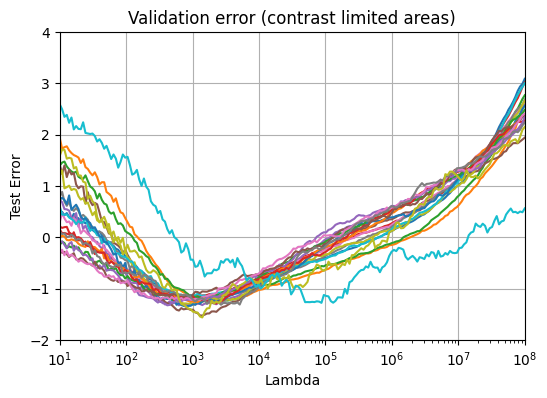

In [3]:
all_results_final = dict()

for tmp_dataset in datasets:
    print("---------------------------")
    print(tmp_dataset)
    print("---------------------------")
    # 1.) Load the dataset
    print("Loading data ... ", end='')
    science_data, raw_angles, raw_psf_template_data = load_adi_data(
        tmp_dataset,
        data_tag="object",
        psf_template_tag="psf_template",
        para_tag="header_object/PARANG") 

    print("[DONE]")

    science_data = science_data[:, 17:-17, 17:-17]
    psf_template = np.median(raw_psf_template_data, axis=0)
    psf_template = psf_template - np.min(psf_template)

    # 2.) Create the model
    s4_model = S4(
        data_cube=science_data,
        parang=raw_angles,
        psf_template=psf_template,
        noise_noise_cut_radius_psf=4.0,
        noise_mask_radius=5.5,
        device=0,
        convolve=True,
        noise_lambda_init=1e3,
        noise_normalization="normal",
        planet_convolve_second=True,
        planet_use_up_sample=1,
        work_dir=Path("/fast/mbonse/s4/70_results/"
            "03_contrast_grid/find_best_lambdas/") / Path(tmp_dataset).name[:-5],
        verbose=True)
    
    
    # 3.) Find the lambdas
    lambdas = np.logspace(1, 8, 200)
    all_results, best_lambda = s4_model.validate_lambdas_noise(
        num_separations=20, 
        lambdas=lambdas,
        num_test_positions=1,
        test_size=0.3,
        approx_svd=5000)

    # 4.) Plot the result
    merged_results = np.array([i for i in all_results.values()])
    all_results_final[tmp_dataset] = (all_results, best_lambda)
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))

    ax1.plot(lambdas, np.array(merged_results).T)
    ax1.set_title("Validation error (contrast limited areas)")
    ax1.set_xlabel("Lambda")
    ax1.set_ylabel("Test Error")
    ax1.set_xscale("log")
    ax1.grid()
    ax1.set_ylim(-2, 4)
    ax1.set_xlim(1e1, 1e8)
    plt.show()

In [ ]:
def plot_results(tmp_dataset):
    print(all_results_final[tmp_dataset][1])
    
    all_results = all_results_final[tmp_dataset][0]
    merged_results = np.array([i for i in all_results.values()])

    fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))

    ax1.plot(lambdas, np.array(merged_results).T)
    ax1.set_title("Validation error (contrast limited areas)")
    ax1.set_xlabel("Lambda")
    ax1.set_ylabel("Test Error")
    ax1.set_xscale("log")
    ax1.grid()
    ax1.set_ylim(-2, 4)
    ax1.set_xlim(1e1, 1e8)

58052.25516094896


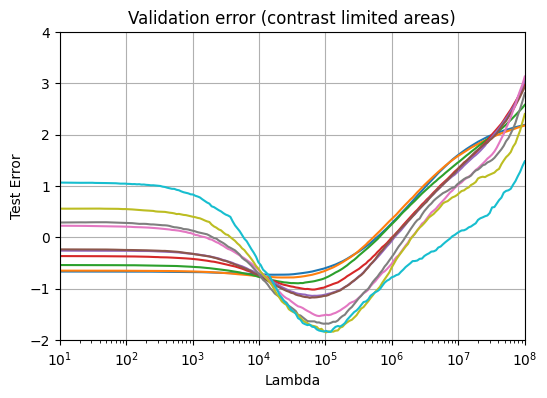

In [17]:
plot_results("/fast/mbonse/s4/30_data/HD22049_310_0100_C-0656_A_.hdf5")

68260.71834272379


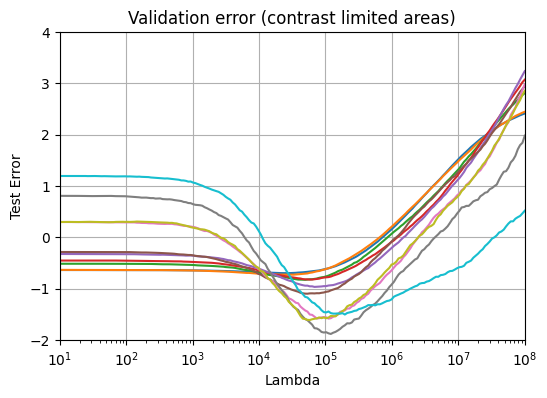

In [18]:
plot_results("/fast/mbonse/s4/30_data/HD22049_303_199_C-0065_C_.hdf5")

74019.59996915652


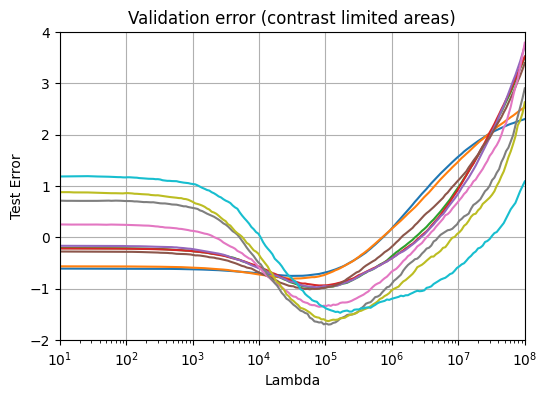

In [19]:
plot_results("/fast/mbonse/s4/30_data/HD22049_304_199_C-0065_C_.hdf5")

53535.66677410719


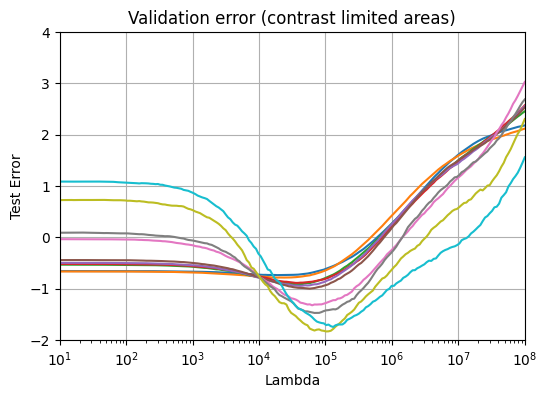

In [20]:
plot_results("/fast/mbonse/s4/30_data/HD22049_351_096_C-0679_A_.hdf5")